In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import pickle

from pygenstability import plotting
from pygenstability.contrib.optimal_scales import *

# Setup MSF

In [2]:
import sys
from pathlib import Path

module_path = str(Path.cwd().parents[0])
if module_path not in sys.path:
    sys.path.append(module_path)

from msfiltration import MSF
from msfiltration.msf_bootstrapping import plot_pds, select_scales_pds, msf_bootstrap

In [3]:
# Set MS parameters
n_time = 200
min_time = -1.5
max_time = 0.5

In [4]:
# number of bootstraps
B = 20
# number of samples for each bootstrap
n_sample = 150

# 5th real network: ADG 2RGX


In [6]:
# Load graph in networkx
G = nx.read_gpickle("/home/tc/OneDrive/Software/MSFiltration/experiments/adk_graph/2RGX.gpickle")

# Get sparse adajacency matrix
A = G.adjacency()

In [7]:
# Compute spring layout
pos = nx.spring_layout(G,seed=5)

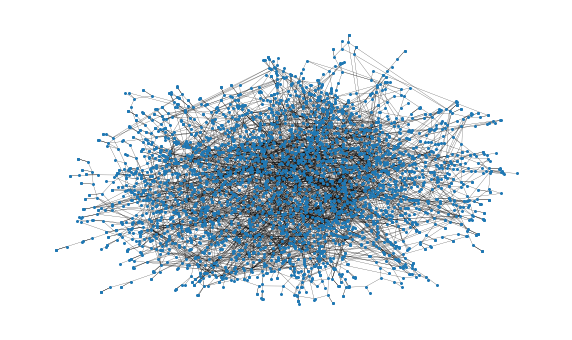

In [9]:
# Plot network
fig, ax = plt.subplots(1,figsize =(10,6))
nx.draw(G,ax=ax,pos=pos, node_size = 4,width = 0.2)

In [8]:
print(G)

Graph with 3394 nodes and 4494 edges


### Full MSF

In [23]:
# initialise MSF object
msf = MSF()

# run MS analysis, build filtration and compute PH
msf.fit_transform(A,min_time,max_time,n_time,with_ttprime=True,with_optimal_scales=True)

Running Markov Stability analysis ... 


100%|██████████| 200/200 [02:49<00:00,  1.18it/s]


Building filtration ...


100%|██████████| 200/200 [00:01<00:00, 171.77it/s] 


Computing persistence ... 


In [57]:
# store ms results
root = "/home/tc/OneDrive/Software/MSFiltration/experiments/results/real networks/"
with open(root + "ms_adg_2rgx.pkl", "wb") as handle:
    pickle.dump(
        msf.ms_results, handle, protocol=pickle.HIGHEST_PROTOCOL,
    )

In [56]:
# load ms results
with open(root + "ms_london_transport.pkl", 'rb') as handle:
        ms_results = pickle.load(handle)

# initialise new MSF object and compute PH
msf = MSF()
msf.load_ms_results(ms_results)
msf.build_filtration()
msf.compute_persistence()

Building filtration ...


100%|██████████| 200/200 [00:02<00:00, 98.95it/s]


Computing persistence ... 


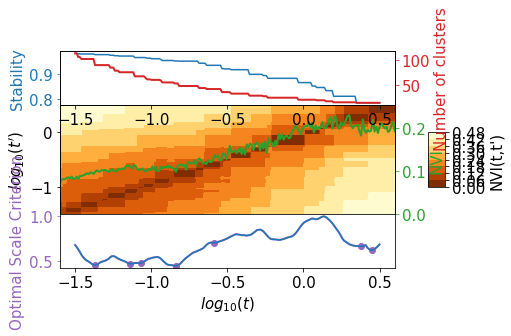

In [63]:
# select optimal scales with nvi
identify_optimal_scales(msf.ms_results,criterion_threshold=0,window_size=20)
selected_scales_nvi = msf.log_times[msf.ms_results['selected_partitions']]
# plot nvi summary of ms
plotting.plot_scan(msf.ms_results)

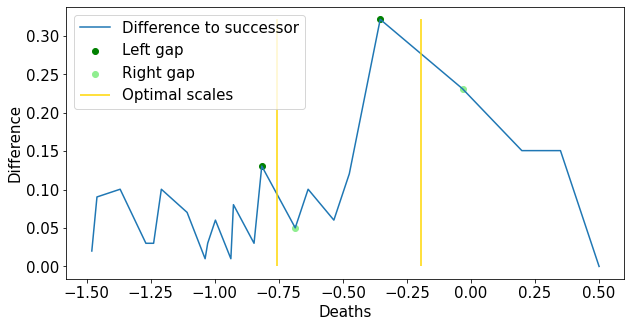

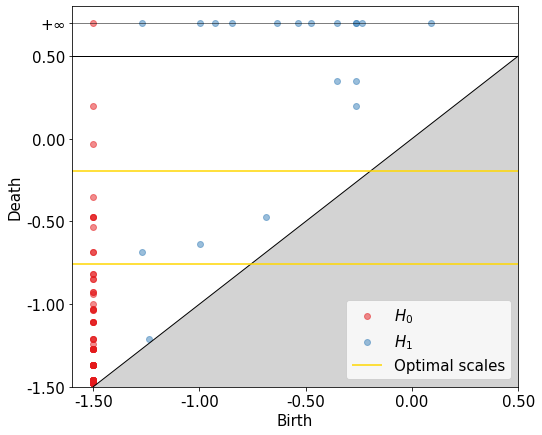

In [53]:
# select optimal scales with ph
msf.select_scales(with_plot=True, threshold_abs=0,min_gap_width=0.105)
# plot persistence diagram with optimal scales
ax = msf.plot_persistence_diagram()

### Bootstrap MSF

In [54]:
persistences_bootstrapped = msf_bootstrap(msf.community_ids, msf.log_times, n_sample, B)

Building filtration ...


100%|██████████| 200/200 [00:00<00:00, 2795.56it/s]


Computing persistence ... 
Building filtration ...


100%|██████████| 200/200 [00:00<00:00, 2107.09it/s]

Computing persistence ... 


Building filtration ...


100%|██████████| 200/200 [00:00<00:00, 2031.58it/s]


Computing persistence ... 
Building filtration ...


100%|██████████| 200/200 [00:00<00:00, 2096.95it/s]


Computing persistence ... 
Building filtration ...


100%|██████████| 200/200 [00:00<00:00, 2922.35it/s]


Computing persistence ... 
Building filtration ...


100%|██████████| 200/200 [00:00<00:00, 3495.27it/s]


Computing persistence ... 
Building filtration ...


100%|██████████| 200/200 [00:00<00:00, 3665.24it/s]


Computing persistence ... 
Building filtration ...


100%|██████████| 200/200 [00:00<00:00, 3441.62it/s]


Computing persistence ... 
Building filtration ...


100%|██████████| 200/200 [00:00<00:00, 2881.72it/s]


Computing persistence ... 
Building filtration ...


100%|██████████| 200/200 [00:00<00:00, 3280.86it/s]


Computing persistence ... 
Building filtration ...


100%|██████████| 200/200 [00:00<00:00, 3192.81it/s]


Computing persistence ... 
Building filtration ...


100%|██████████| 200/200 [00:00<00:00, 3629.97it/s]


Computing persistence ... 
Building filtration ...


100%|██████████| 200/200 [00:00<00:00, 3432.65it/s]


Computing persistence ... 
Building filtration ...


100%|██████████| 200/200 [00:00<00:00, 2164.03it/s]


Computing persistence ... 
Building filtration ...


100%|██████████| 200/200 [00:00<00:00, 1878.69it/s]


Computing persistence ... 
Building filtration ...


100%|██████████| 200/200 [00:00<00:00, 2307.39it/s]


Computing persistence ... 
Building filtration ...


100%|██████████| 200/200 [00:00<00:00, 3083.97it/s]


Computing persistence ... 
Building filtration ...


100%|██████████| 200/200 [00:00<00:00, 1267.32it/s]


Computing persistence ... 
Building filtration ...


100%|██████████| 200/200 [00:00<00:00, 3089.86it/s]


Computing persistence ... 
Building filtration ...


100%|██████████| 200/200 [00:00<00:00, 1964.60it/s]


Computing persistence ... 


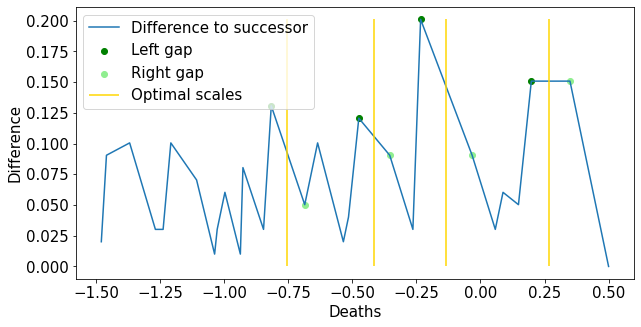

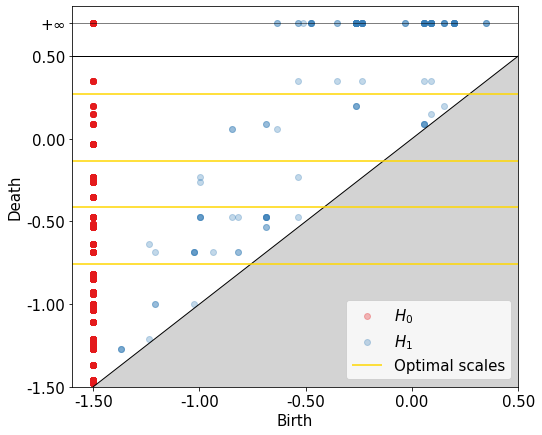

In [55]:
# select optimal scales with ph
optimal_scales_ph, gap_width, ax = select_scales_pds(persistences_bootstrapped, msf.log_times, with_plot=True,threshold_abs=0,min_gap_width=0.105)

# plot optimal scales in PD
fig, ax = plot_pds(persistences_bootstrapped,msf.log_times,optimal_scales_ph,alpha=0.3)